Identify key questions or hypotheses
Refine the data through cleaning and manipulation
Analyse the dataset to extract meaningful insights
Create visualisations (plots) to effectively communicate your findings
Finish with a conclusion that must have:
Key findings (the answers to your questions/hypotheses)
Important considerations
Possibilities for future areas of analysis

## Introduction ##
This Pokemon.csv file was taken from Kaggle and contains information about the 151 generation 1 pokemon. It contains information such as, their name, type, stats and legendary status.

**Questions to Answer**

1. Do Legendary pokemon have higher stats than non-legendary pokemon?
2. Which Stage shows the greatest increase in Total stats from the previous one?
3. Which type(s) tend to have the highest stats on average?
4. Do Pokémon with high HP tend to have low Defense or Sp. Defense?
5. Are there Pokémon with extremely high individual stats compared to others in the same Stage or Type?
6. Which type(s) have the highest Attack / Defense / Speed on average?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
df = pd.read_csv('../data/Pokemon.csv', encoding='latin1')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   #          151 non-null    int64 
 1   Name       151 non-null    object
 2   Type 1     151 non-null    object
 3   Type 2     67 non-null     object
 4   Total      151 non-null    int64 
 5   HP         151 non-null    int64 
 6   Attack     151 non-null    int64 
 7   Defense    151 non-null    int64 
 8   Sp. Atk    151 non-null    int64 
 9   Sp. Def    151 non-null    int64 
 10  Speed      151 non-null    int64 
 11  Stage      151 non-null    int64 
 12  Legendary  151 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 14.4+ KB


In [3]:
df.head(20)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False
5,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,3,False
6,7,Squirtle,Water,NaN,314,44,48,65,50,64,43,1,False
7,8,Wartortle,Water,NaN,405,59,63,80,65,80,58,2,False
8,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,3,False
9,10,Caterpie,Bug,NaN,195,45,30,35,20,20,45,1,False


In [4]:
df = df.drop(columns=['Type 2'])

In [5]:
type1_counts = df['Type 1'].value_counts()
type1_counts

Type 1
Water       28
Normal      22
Poison      14
Fire        12
Grass       12
Bug         12
Electric     9
Rock         9
Ground       8
Psychic      8
Fighting     7
Dragon       3
Ghost        3
Fairy        2
Ice          2
Name: count, dtype: int64

In [6]:
fairy_type_msk = df['Type 1'] == 'Fairy'
fairy_type = df[fairy_type_msk]
fairy_type

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
34,35,Clefairy,Fairy,323,70,45,48,60,65,35,1,False
35,36,Clefable,Fairy,483,95,70,73,95,90,60,2,False


In [7]:
df['Type 1'] = df['Type 1'].replace('Fairy', 'Normal')
df['Type 1'].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice', 'Dragon'],
      dtype=object)

In [8]:
df.sort_values(by='Legendary', ascending=False, inplace=True)
df.head(20)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
149,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True
145,146,Moltres,Fire,580,90,100,90,125,85,90,1,True
144,145,Zapdos,Electric,580,90,90,85,125,90,100,1,True
143,144,Articuno,Ice,580,90,85,100,95,125,85,1,True
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False
102,103,Exeggutor,Grass,520,95,95,85,125,65,55,2,False
96,97,Hypno,Psychic,483,85,73,70,73,115,67,2,False
97,98,Krabby,Water,325,30,105,90,25,25,50,1,False
98,99,Kingler,Water,475,55,130,115,50,50,75,2,False
99,100,Voltorb,Electric,330,40,30,50,55,55,100,1,False


In [9]:
df.sort_values(by='Total', ascending=False, inplace=True)
df.head(20)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
149,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True
150,151,Mew,Psychic,600,100,100,100,100,100,100,1,False
148,149,Dragonite,Dragon,600,91,134,95,100,100,80,3,False
143,144,Articuno,Ice,580,90,85,100,95,125,85,1,True
144,145,Zapdos,Electric,580,90,90,85,125,90,100,1,True
145,146,Moltres,Fire,580,90,100,90,125,85,90,1,True
58,59,Arcanine,Fire,555,90,110,80,100,80,95,2,False
142,143,Snorlax,Normal,540,160,110,65,65,110,30,1,False
129,130,Gyarados,Water,540,95,125,79,60,100,81,2,False
130,131,Lapras,Water,535,130,85,80,85,95,60,1,False


In [10]:
df.sort_values(by='HP', ascending=False, inplace=True)
df.head(20)

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
112,113,Chansey,Normal,450,250,5,5,35,105,50,1,False
142,143,Snorlax,Normal,540,160,110,65,65,110,30,1,False
39,40,Wigglytuff,Normal,435,140,70,45,85,50,45,2,False
130,131,Lapras,Water,535,130,85,80,85,95,60,1,False
133,134,Vaporeon,Water,525,130,65,60,110,95,65,2,False
38,39,Jigglypuff,Normal,270,115,45,20,45,25,20,1,False
149,150,Mewtwo,Psychic,680,106,110,90,154,90,130,1,True
88,89,Muk,Poison,500,105,105,75,65,100,50,2,False
111,112,Rhydon,Ground,485,105,130,120,45,45,40,2,False
114,115,Kangaskhan,Normal,490,105,95,80,40,80,90,1,False


In [11]:
legendary_stats = df.groupby('Legendary')['Total'].mean()
legendary_stats

Legendary
False    401.693878
True     605.000000
Name: Total, dtype: float64

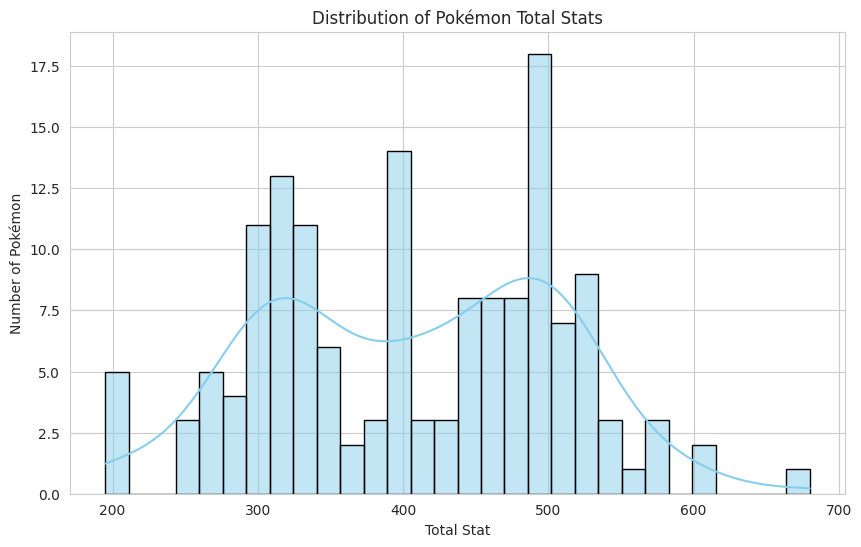

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Pokémon Total Stats')
plt.xlabel('Total Stat')
plt.ylabel('Number of Pokémon')
plt.show()

In [13]:
stage_stats = df.groupby('Stage')['Total'].mean()
stage_stats

Stage
1    360.734177
2    446.660714
3    497.375000
Name: Total, dtype: float64

In [14]:
stage_diff = stage_stats.diff()
stage_diff

Stage
1          NaN
2    85.926537
3    50.714286
Name: Total, dtype: float64

Text(0, 0.5, 'Average Total Stat')

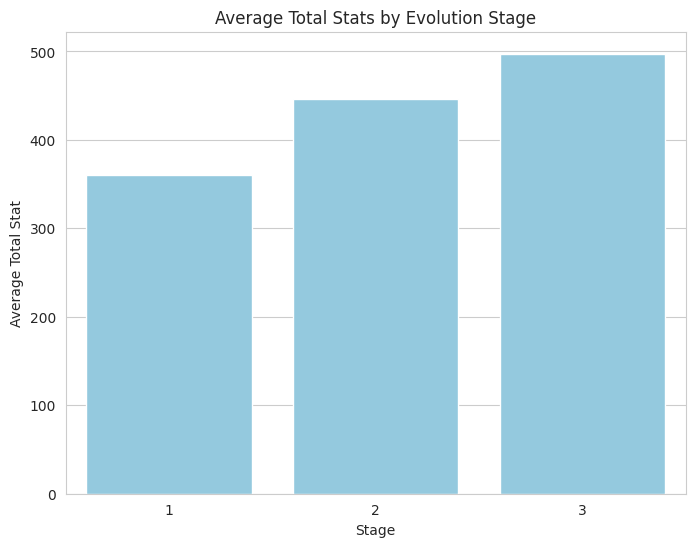

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x=stage_stats.index, y=stage_stats.values, color="skyblue")
plt.title('Average Total Stats by Evolution Stage')
plt.xlabel('Stage')
plt.ylabel('Average Total Stat')

In [16]:
avg_total_by_type = df.groupby('Type 1')['Total'].mean().sort_values()
avg_total_by_type

Type 1
Bug         336.250000
Ground      374.375000
Normal      382.291667
Poison      383.500000
Ghost       405.000000
Grass       409.416667
Water       411.214286
Fighting    412.142857
Rock        420.555556
Dragon      440.000000
Electric    444.444444
Fire        455.583333
Psychic     470.125000
Ice         517.500000
Name: Total, dtype: float64

Text(0, 0.5, 'Average Total Stat')

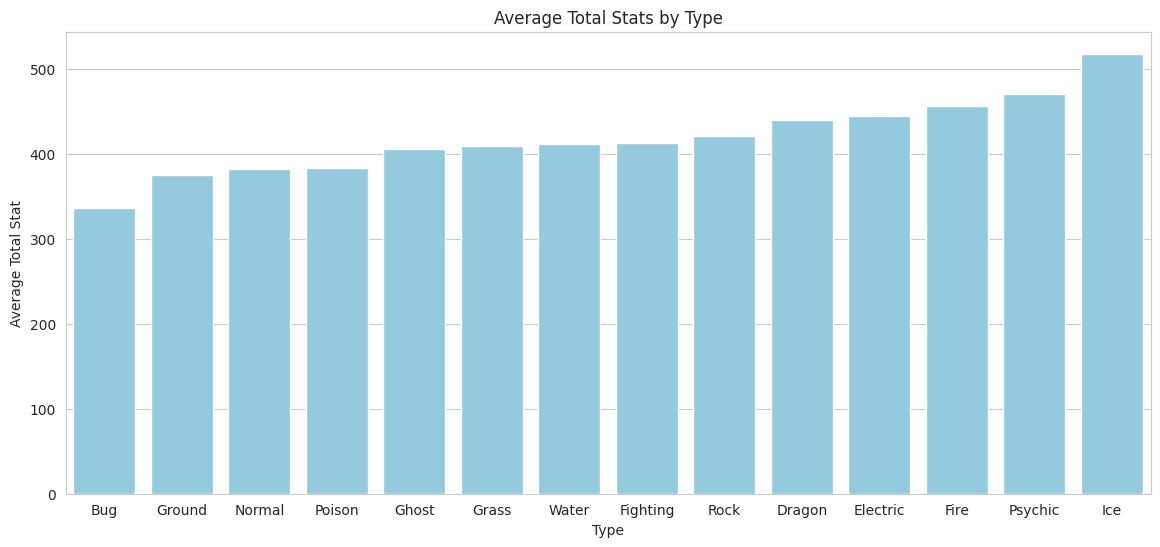

In [17]:
plt.figure(figsize=(14, 6))
sns.barplot(x=avg_total_by_type.index, y=avg_total_by_type.values, color="skyblue")
plt.title('Average Total Stats by Type')
plt.xlabel('Type')
plt.ylabel('Average Total Stat')

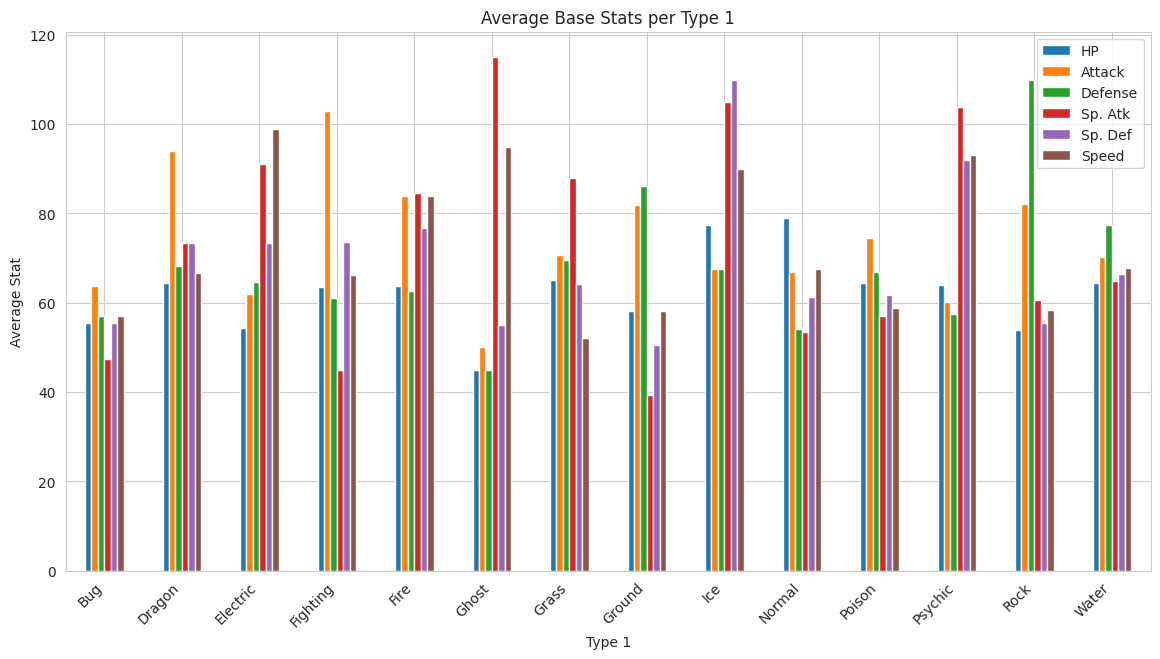

In [18]:
stat_cols = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

avg_stats_per_type = df.groupby('Type 1')[stat_cols].mean().sort_index()

avg_stats_per_type.plot(kind='bar', figsize=(14, 7))
plt.title('Average Base Stats per Type 1')
plt.ylabel('Average Stat')
plt.xlabel('Type 1')
plt.xticks(rotation=45, ha='right')
plt.show()

<Figure size 1400x500 with 0 Axes>

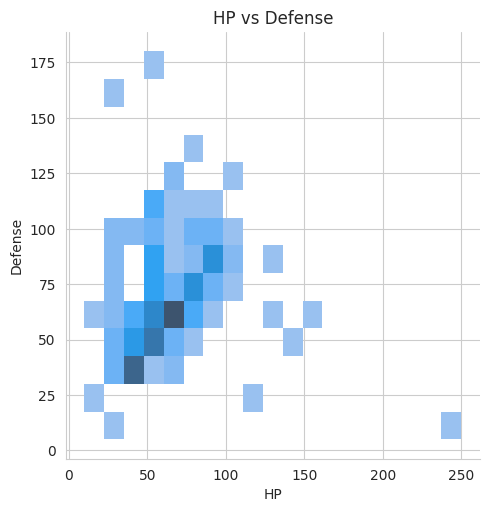

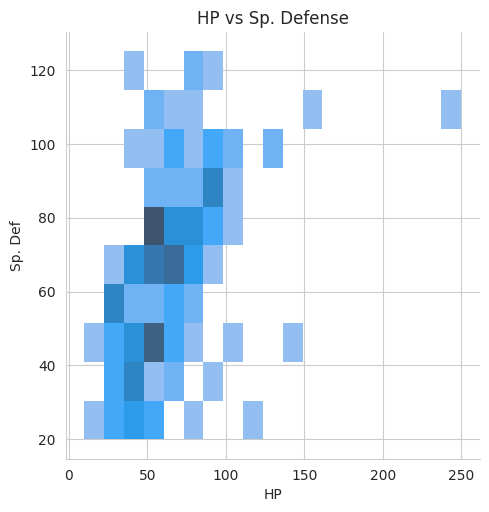

In [19]:
plt.figure(figsize=(14,5))
sns.displot(data=df, x='HP', y='Defense')
plt.title("HP vs Defense")
plt.show()

sns.displot(data=df, x='HP', y='Sp. Def')
plt.title("HP vs Sp. Defense")
plt.show()

In [20]:
df['Z_Attack'] = df.groupby('Stage')['Attack'].transform(lambda x: (x - x.mean()) / x.std())
outliers = df[df['Z_Attack'] > 2][['Name', 'Stage', 'Type 1', 'Attack', 'Z_Attack']]
outliers

,Name,Stage,Type 1,Attack,Z_Attack
111,Rhydon,2,Ground,130,2.089403
135,Flareon,2,Fire,130,2.089403
126,Pinsir,1,Bug,125,2.393916
98,Kingler,2,Water,130,2.089403
105,Hitmonlee,1,Fighting,120,2.198665


In [21]:
type_mean = df.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].mean()
type_mean

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
Type 1,,,,,,
Bug,55.416667,63.750000,57.083333,47.500000,55.416667,57.083333
Dragon,64.333333,94.000000,68.333333,73.333333,73.333333,66.666667
Electric,54.444444,62.000000,64.666667,91.111111,73.333333,98.888889
Fighting,63.571429,102.857143,61.000000,45.000000,73.571429,66.142857
Fire,63.833333,83.916667,62.583333,84.583333,76.666667,84.000000
Ghost,45.000000,50.000000,45.000000,115.000000,55.000000,95.000000
Grass,65.000000,70.666667,69.583333,87.916667,64.166667,52.083333
Ground,58.125000,81.875000,86.250000,39.375000,50.625000,58.125000
Ice,77.500000,67.500000,67.500000,105.000000,110.000000,90.000000


In [22]:
type_var = df.groupby('Type 1')[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']].var()
type_var['Total_Var'] = type_var.sum(axis=1)
type_var

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total_Var
Type 1,,,,,,,
Bug,142.992424,1218.750000,415.719697,588.636364,670.265152,724.810606,3761.174242
Dragon,633.333333,1300.000000,633.333333,633.333333,633.333333,233.333333,4066.666667
Electric,377.777778,496.000000,298.500000,686.111111,275.000000,829.861111,2963.250000
Fighting,322.619048,348.809524,271.333333,175.000000,880.952381,486.809524,2485.523810
Fire,295.060606,632.628788,256.446970,478.628788,337.878788,263.818182,2264.462121
Ghost,225.000000,225.000000,225.000000,225.000000,400.000000,225.000000,1525.000000
Grass,231.818182,415.333333,464.265152,379.356061,440.151515,202.083333,2133.007576
Ground,849.553571,635.267857,1069.642857,110.267857,310.267857,1099.553571,4074.553571
Ice,312.500000,612.500000,2112.500000,200.000000,450.000000,50.000000,3737.500000


In [23]:
most_balanced = type_var['Total_Var'].sort_values().head(3)
most_balanced

Type 1
Ghost    1525.000000
Grass    2133.007576
Fire     2264.462121
Name: Total_Var, dtype: float64

In [25]:
print("Top Attack:", type_mean['Attack'].sort_values(ascending=False).head(3))
print("Top Defense:", type_mean['Defense'].sort_values(ascending=False).head(3))
print("Top Speed:", type_mean['Speed'].sort_values(ascending=False).head(3))


Top Attack: Type 1
Fighting    102.857143
Dragon       94.000000
Fire         83.916667
Name: Attack, dtype: float64
Top Defense: Type 1
Rock      110.00
Ground     86.25
Water      77.50
Name: Defense, dtype: float64
Top Speed: Type 1
Electric    98.888889
Ghost       95.000000
Psychic     93.000000
Name: Speed, dtype: float64


## Key Findings ##

**Questions**

1. Do Legendary pokemon have higher stats than non-legendary pokemon? - Yes on average, legendary pokemon have much higher stats than non-legendary pokemon (on average 50% higher)

2. Which Stage shows the greatest increase in Total stats from the previous one? - Stage 1 to Stage 2 has the biggest increase in average stats (85.9). Stage 2 to Stage 3 is only an average increase of 50.7.

3. Which type(s) tend to have the highest stats on average? - Ice types tend to have the highest overall stats on average

4. Do Pokémon with high HP tend to have low Defense or Sp. Defense? - No, there is no clear trend indicating that high HP correlates to low Defense of Sp. Defense

5. Are there Pokémon with extremely high individual stats compared to others in the same Stage or Type?

6. Which type(s) have the highest Attack / Defense / Speed on average?
    - Attack - Fighting
    - Defense - Rock
    - Speed - Electric

**Suggestions for Future Analysis**

Further analysis could explore:
   - Whether there are big increases in individual stats when pokemon evolve to the next stage